In [1]:

# Concrete compressive strength prediction in civil engineering

In [2]:
# Important libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns
import numpy as np
import itertools as it
from sklearn.linear_model import LinearRegression  # Linear regression
from sklearn.metrics import mean_squared_error        # Compute mean square error
from sklearn.model_selection import train_test_split   # Splitting dataset into training and test data
from sklearn.linear_model import Lasso              #Lasso Regression
from sklearn.neighbors import KNeighborsRegressor   #KNN Neighbor
from sklearn.svm import SVR          # SVM
from sklearn import metrics
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import PolynomialFeatures
import statsmodels.api as sm

In [4]:
# Loading of dataset
df=pd.read_csv('concrete_data.csv', sep=',') # Create a dataframe
df.head(5)   #Reading of first 5 rows

,cement,blast_furnace_slag,fly_ash,water,superplasticizer,coarse_aggregate,fine_aggregate,age,concrete_compressive_strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [5]:
# Data Structuring
print('Number of rows',df.shape[0])
print('Number of columns',df.shape[1])
print(df.info())

Number of rows 1030
Number of columns 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
cement                           1030 non-null float64
blast_furnace_slag               1030 non-null float64
fly_ash                          1030 non-null float64
water                            1030 non-null float64
superplasticizer                 1030 non-null float64
coarse_aggregate                 1030 non-null float64
fine_aggregate                   1030 non-null float64
age                              1030 non-null int64
concrete_compressive_strength    1030 non-null float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB
None


In [6]:
# Missing Values
print('Number of missing values', df.isnull().sum())
'The dataset contains no missing values'

Number of missing values cement                           0
blast_furnace_slag               0
fly_ash                          0
water                            0
superplasticizer                 0
coarse_aggregate                 0
fine_aggregate                   0
age                              0
concrete_compressive_strength    0
dtype: int64


'The dataset contains no missing values'

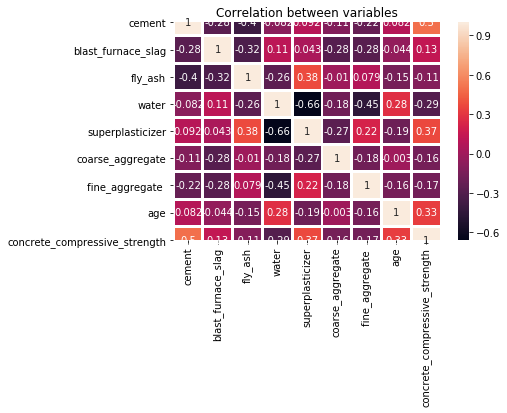

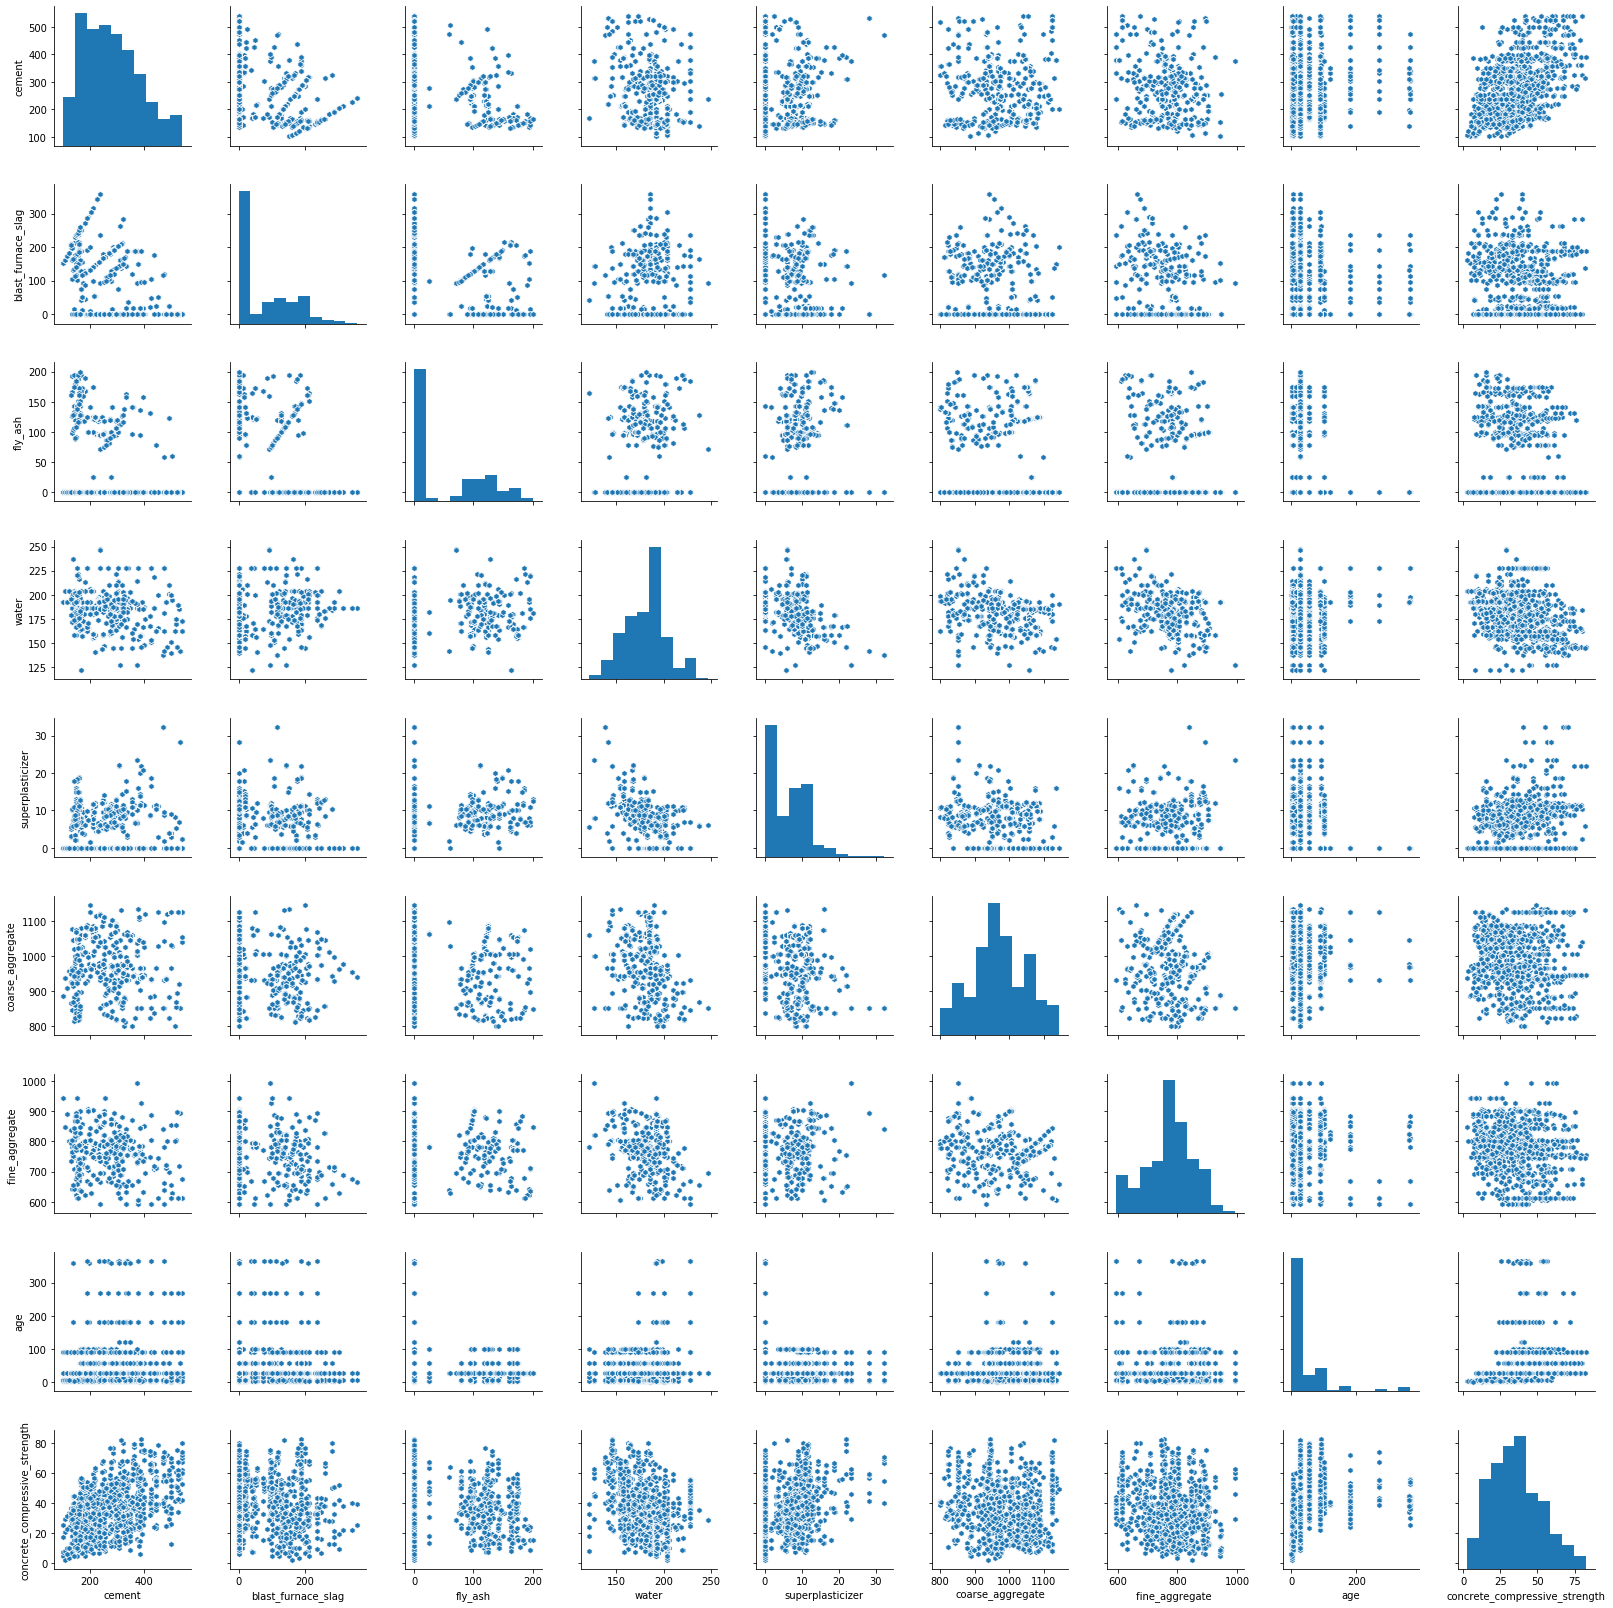

Text(0.5, 1.0, 'Distribution of concrete strength')

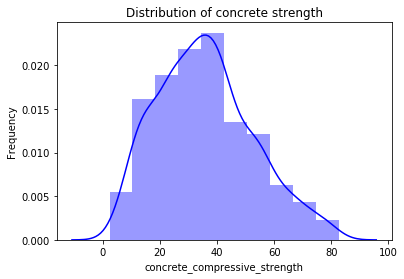

In [7]:
# Data visualization 
#1 Correlation Matrix
sns.heatmap(df.corr(), annot=True, linewidth=2)
plt.title("Correlation between variables")
plt.show()

#2 Pair plot
sns.pairplot(df,markers="h")
plt.show()

#3 Distribution plot
sns.distplot(df['concrete_compressive_strength'], bins=10, color='b')
plt.ylabel("Frequency")
plt.title('Distribution of concrete strength')

ValueError: num must be 1 <= num <= 8, not 9

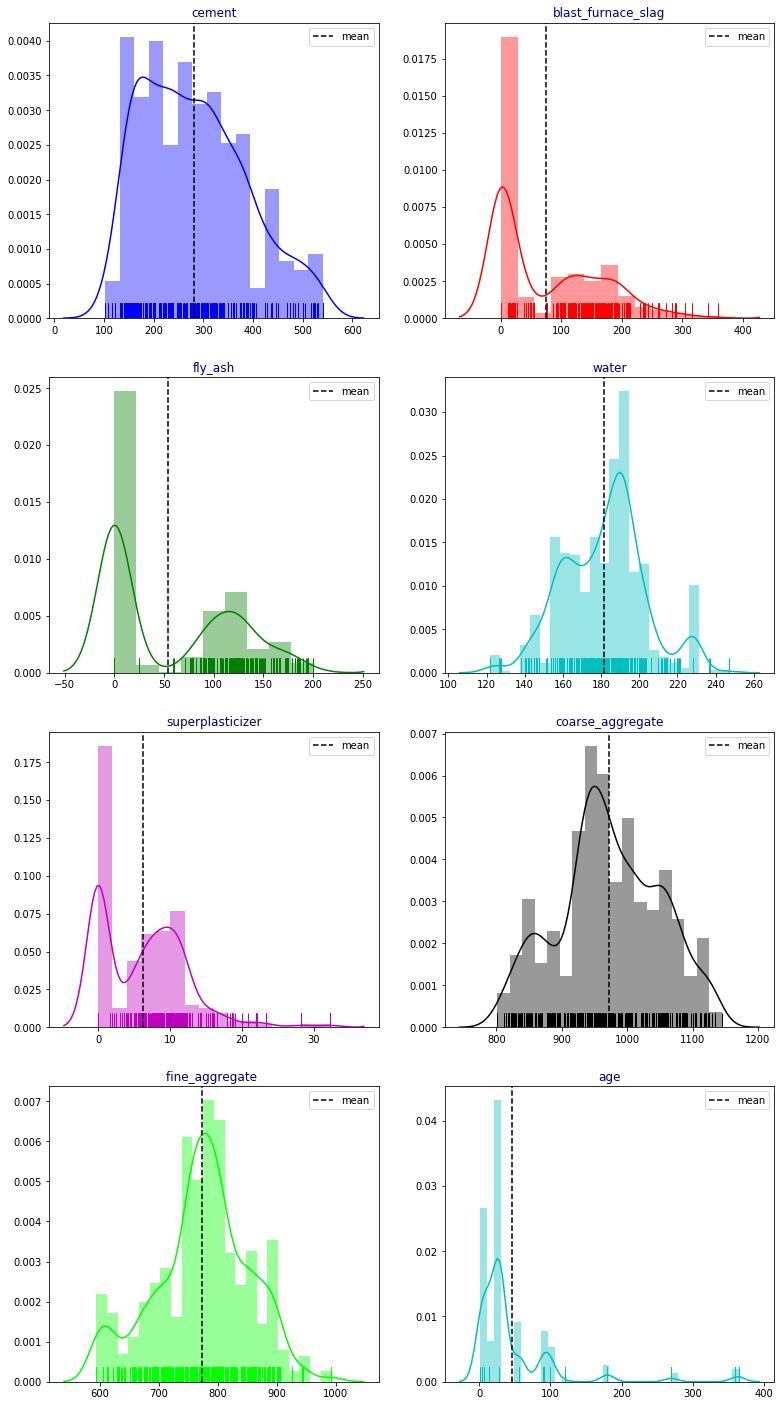

In [8]:
# Distribution of components of concrete
cols = [i for i in df.columns if i not in 'compressive_strength']
length = len(cols)
cs = ["b","r","g","c","m","k","lime","c"]
fig = plt.figure(figsize=(13,25))

for i,j,k in it.zip_longest(cols,range(length),cs):
    plt.subplot(4,2,j+1)
    ax = sns.distplot(df[i],color=k,rug=True)
    ax.set_facecolor("w")
    plt.axvline(df[i].mean(),linestyle="dashed",label="mean",color="k")
    plt.legend(loc="best")
    plt.title(i,color="navy")
    plt.xlabel("")

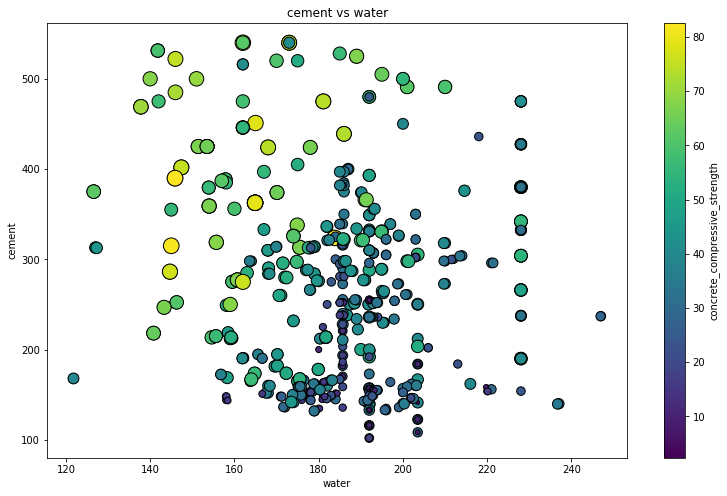

In [9]:
# Scatterplot between components
fig = plt.figure(figsize=(13,8))
ax = fig.add_subplot(111)
plt.scatter(df["water"],df["cement"],
            c=df["concrete_compressive_strength"],s=df["concrete_compressive_strength"]*3,
            linewidth=1,edgecolor="k",cmap="viridis")
ax.set_facecolor("w")
ax.set_xlabel("water")
ax.set_ylabel("cement")
lab = plt.colorbar()
lab.set_label("concrete_compressive_strength")
plt.title("cement vs water")
plt.show()

In [10]:
# Data Splitting
# The dataset is divided into a 70 to 30 splitting between training data and test data

train,test = train_test_split(df,test_size =.3,random_state = 0)
train_X = train[[x for x in train.columns if x not in ["concrete_compressive_strength"] + ["age_months"]]]
train_Y = train["concrete_compressive_strength"]
test_X  = test[[x for x in test.columns if x not in ["concrete_compressive_strength"] + ["age_months"]]]
test_Y  = test["concrete_compressive_strength"]

In [206]:
#Model 1= Multiple linear regression
# fit a model
lm = LinearRegression()
model = lm.fit(train_X, train_Y)
predictions = lm.predict(test_X)
m1=model.score(test_X, test_Y)
RMSE1=np.sqrt(metrics.mean_squared_error(test_Y, predictions))
print('Accuracy of model is', model.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions)))

Accuracy of model is 0.6352987285077926
Mean Absolute Error: 7.7756257101890345
Mean Squared Error: 93.61873598596335
Root Mean Squared Error: 9.675677546609506


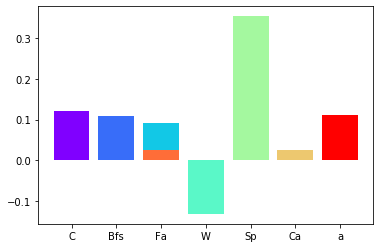

'where C:Cement, Bfs: Blast_furnace_slag, Fa: Fly_ash, W:water, Sp:Superlasticizer, Ca:Coarse_aggregate, Fa: Fine_aggregate, a: Age'

In [177]:
# Features Importance
coef=pd.DataFrame(lm.coef_.ravel())
coef['feat']=train_X.columns
c=coef['feat'].rows=['C','Bfs','Fa','W','Sp','Ca','Fa','a']
num_colors = 8;
colors = cm.rainbow(np.linspace(0,1,num_colors))
plt.bar(c, coef[0], color=colors)
plt.show()
'where C:Cement, Bfs: Blast_furnace_slag, Fa: Fly_ash, W:water, Sp:Superlasticizer, Ca:Coarse_aggregate, Fa: Fine_aggregate, a: Age'

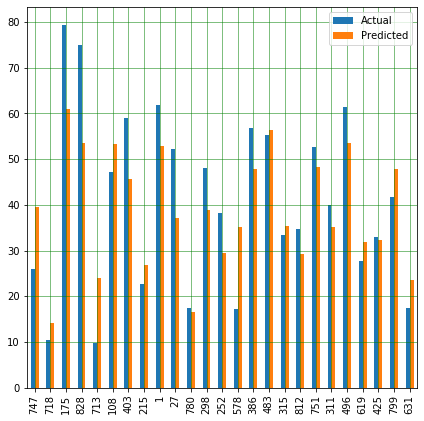

In [178]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [205]:
# Model 2: LASSO Model
las = Lasso(alpha=0.1)
model2 = las.fit(train_X, train_Y)
predictions2 = las.predict(test_X)
m12=model2.score(test_X, test_Y)
RMSE12=np.sqrt(metrics.mean_squared_error(test_Y, predictions2))
print('Accuracy of model is', model2.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions2))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions2)))

Accuracy of model is 0.6354616985594395
Mean Absolute Error: 7.773442953529143
Mean Squared Error: 93.5769016096358
Root Mean Squared Error: 9.673515473168779


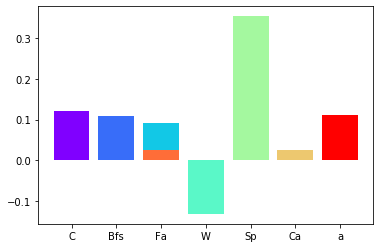

In [180]:
# Feature selection
coef1=pd.DataFrame(las.coef_.ravel())
coef1['feat']=train_X.columns
c1=coef['feat'].rows=['C','Bfs','Fa','W','Sp','Ca','Fa','a']
num_colors = 8;
colors = cm.rainbow(np.linspace(0,1,num_colors))
plt.bar(c1, coef[0], color=colors)
plt.show()

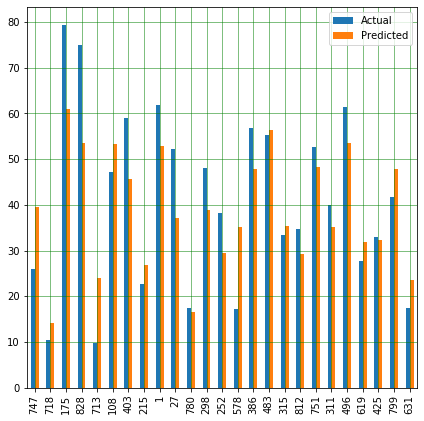

In [181]:
#Plot of true value vs. predicted values
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions2})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [204]:
# Model 3: KNN Neighbor
knn = KNeighborsRegressor()
model3=knn.fit(train_X,train_Y)
predictions3 = knn.predict(test_X)
m13=model3.score(test_X, test_Y)
RMSE13=np.sqrt(metrics.mean_squared_error(test_Y, predictions3))
print('Accuracy of model is', model3.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions3))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions3))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions3)))

Accuracy of model is 0.6478705751615099
Mean Absolute Error: 7.313818770226536
Mean Squared Error: 90.39154572168285
Root Mean Squared Error: 9.507446856106156


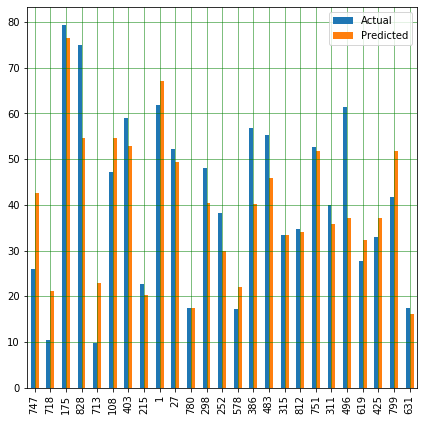

In [183]:
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions3})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In [ ]:
svm= SVR(kernel='linear')
model4=svm.fit(train_X, train_Y)
predictions4 = svm.predict(test_X)
m4=model4.score(test_X, test_Y)
RMSE4=np.sqrt(metrics.mean_squared_error(test_Y, predictions4))
print('Accuracy of model is', model4.score(test_X, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(test_Y, predictions4))  
print('Mean Squared Error:', metrics.mean_squared_error(test_Y, predictions4))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(test_Y, predictions4)))

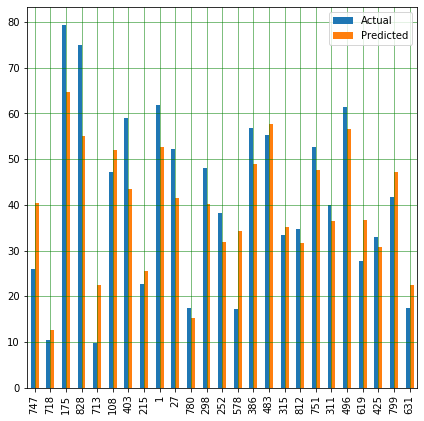

In [185]:
dat = pd.DataFrame({'Actual': test_Y, 'Predicted': predictions4})
dat1=dat.head(25) #just a sample which shows top 25 columns
dat1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

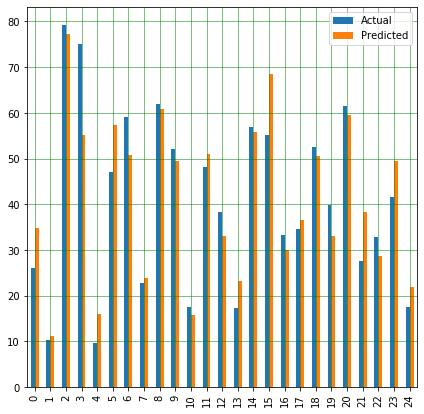

Accuracy of model is 0.7587837045318827
Mean Absolute Error: 5.996021785232059
Mean Squared Error: 61.92016986544649
Root Mean Squared Error: 7.86893702258739


In [202]:
# Polynomial degree 2

train_X1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(train_X)
test_X1 = PolynomialFeatures(degree=2, include_bias=False).fit_transform(test_X)
regressor = LinearRegression()  
m1=regressor.fit(train_X1, train_Y)
y_pred = regressor.predict(test_X1)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25) #just a sample which shows top 25 columns
df1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Performance
p2=m1.score(test_X1, test_Y)
RMSE2=np.sqrt(metrics.mean_squared_error(y_test, y_pred))

print('Accuracy of model is', m1.score(test_X1, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

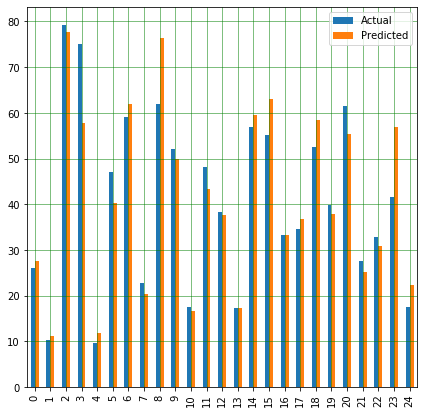

Accuracy of model is 0.7973490461437748
Mean Absolute Error: 4.972564959215883
Mean Squared Error: 52.02045517621665
Root Mean Squared Error: 7.212520722758213


In [225]:
# Polynomial degree 3

train_X1 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(train_X)
test_X1 = PolynomialFeatures(degree=3, include_bias=False).fit_transform(test_X)
regressor = LinearRegression()  
m1=regressor.fit(train_X1, train_Y)
y_pred = regressor.predict(test_X1)

df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1 = df.head(25) #just a sample which shows top 25 columns
df1.plot(kind='bar',figsize=(7,7))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

# Model Performance
p3=m1.score(test_X1, test_Y)
RMSE3=np.sqrt(metrics.mean_squared_error(y_test, y_pred))
             
print('Accuracy of model is', m1.score(test_X1, test_Y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

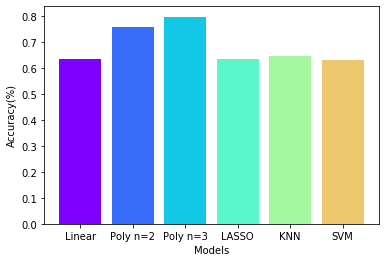

In [223]:
# Model Comparison
height = [m1, p2, p3, m12, m13,m4]
bars = ('Linear', 'Poly n=2', 'Poly n=3', 'LASSO', 'KNN','SVM')
y_pos = np.arange(len(bars))
plt.bar(bars, height, color=colors)
plt.xlabel('Models')
plt.ylabel('Accuracy(%)')
plt.show()


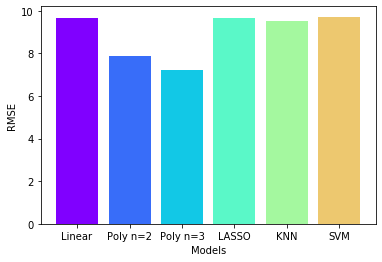

In [226]:
# Model Comparison
height = [RMSE1, RMSE2, RMSE3, RMSE12, RMSE13,RMSE4]
bars = ('Linear', 'Poly n=2', 'Poly n=3', 'LASSO', 'KNN','SVM')
y_pos = np.arange(len(bars))
plt.bar(bars, height, color=colors)
plt.xlabel('Models')
plt.ylabel('RMSE')
plt.show()